I was curious to know how sampling distribution of medians looks like. I chose a skewed distribution so that the mean and the median do not coincide. It turns out that sampling distributions of order statistics indeed turn out to be normal.

In [24]:
import numpy as np
import scipy.stats as scstats
import matplotlib.pyplot as plt

In [25]:
rng = np.random.default_rng()

In [26]:
mu = 0.0
sigma = 1.0

In [27]:
X = rng.lognormal(mean=mu, sigma=sigma, size=100)

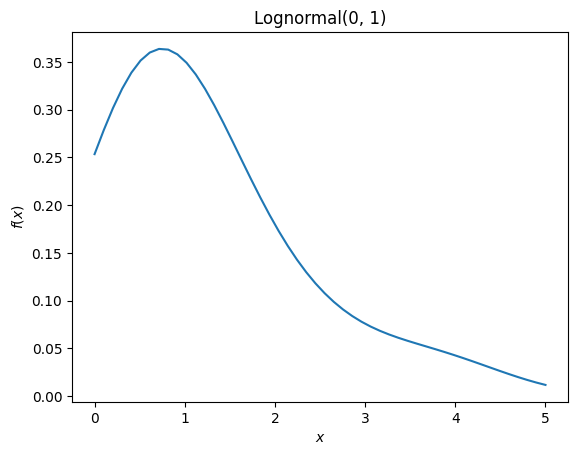

In [28]:
density = scstats.gaussian_kde(X)
points = np.linspace(start=0, stop=5, num=50)
plt.plot(points, density.evaluate(points))
plt.xlabel(r'$x$')
plt.ylabel(r'$f(x)$')
_ = plt.title('Lognormal(0, 1)')

In [29]:
nSamples = 10000
allMedians = [np.median(rng.lognormal(mean=mu, sigma=sigma, size=100)) for i in range(nSamples)]
allMeans = [np.mean(rng.lognormal(mean=mu, sigma=sigma, size=100)) for i in range(nSamples)]

In [30]:
print(f'Parametric mean = {np.exp(mu + sigma**2/2)}')
print(f'Parametric median = {np.exp(mu)}')

Parametric mean = 1.6487212707001282
Parametric median = 1.0


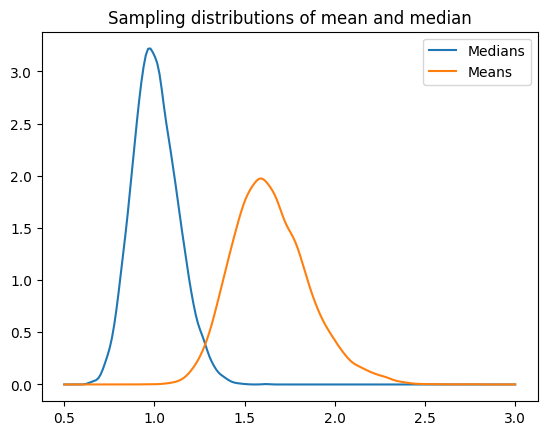

In [32]:
medianDensity = scstats.gaussian_kde(allMedians)
meanDensity = scstats.gaussian_kde(allMeans)
points = np.linspace(0.5, 3, num=200)
plt.plot(points, medianDensity.evaluate(points), label='Medians')
plt.plot(points, meanDensity.evaluate(points), label='Means')
plt.legend()
_ = plt.title('Sampling distributions of mean and median')

Both the densities look like normal densities. This is not a surprise. The sampling distribution of median, and other order statistics, is indeed normal as the answers to this question on [StackExchange](https://stats.stackexchange.com/questions/45124/central-limit-theorem-for-sample-medians#:~:text=The%20distribution%20of%20the%20sample,nonzero%20at%20the%20median%20%CE%BC) show. More details can be found in a [paper by B. O'Neill](https://arxiv.org/pdf/2207.00270).